<a href="https://colab.research.google.com/github/jcmachicao/pucp__gobierno_sistemas_proyectos/blob/main/pucp_gpde__beneficio_modelo_alcance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelamiento del Alcance en Base a Beneficio Fijo y Restricciones de Factores**
José Carlos Machicao, Docente

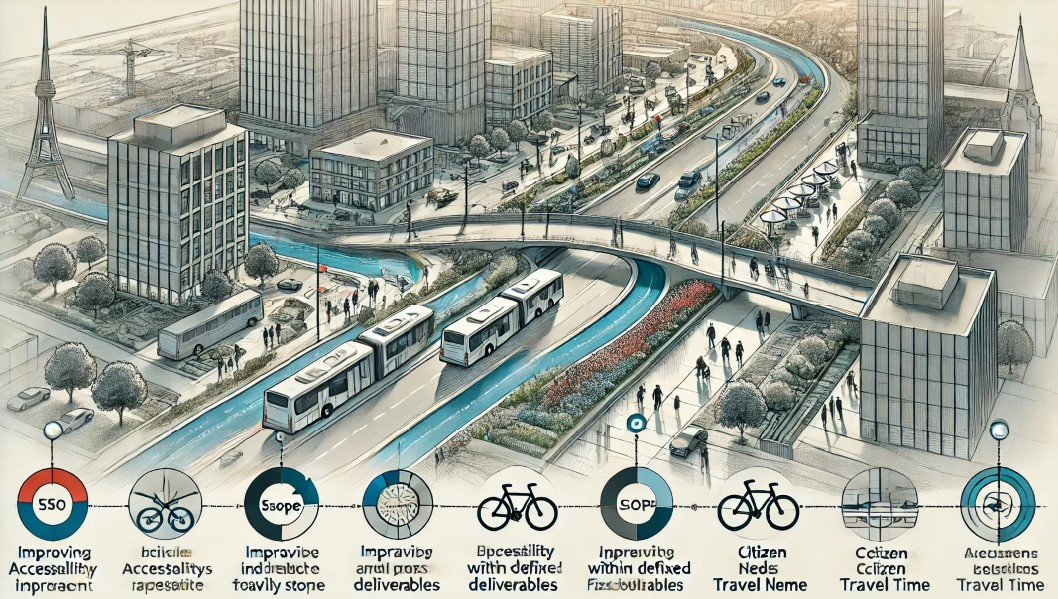

### **Gestión de Proyectos con Enfoque Sistémico Basado en Beneficio (GPSB)**

### **Definición**:
La Gestión de Proyectos con Enfoque Sistémico Basado en Beneficio (GPSB) es un modelo de dirección de proyectos que prioriza la definición clara y estructurada del beneficio esperado antes que la delimitación rígida del alcance. En lugar de planificar el alcance de manera detallada y estática, se define un rango de tolerancia del alcance, permitiendo flexibilidad en la ejecución siempre que se mantenga la alineación con el beneficio proyectado.

### **Principios clave**:
* **Beneficio como punto de control**: En lugar de centrar la planificación en la ejecución de entregables predefinidos, se modela el beneficio esperado con esquemas sistémicos, actores y factores clave.
* **Diagrama de tolerancia del alcance**: Se establece un marco flexible en el que el alcance puede variar dentro de ciertos límites, siempre que se mantenga la alineación con el beneficio definido.
* **Consistencia en la evolución del proyecto**: Al mantener un enfoque sistémico, se minimizan los retrabajos derivados de incoherencias en el desarrollo de diferentes partes del alcance.
* **Adaptabilidad estructurada**: La flexibilidad del alcance no implica improvisación, sino adaptación dentro de una estructura definida por la relación entre el beneficio y los factores sistémicos.

### **Ejemplo práctico**:
Un proyecto para mejorar la movilidad urbana no debe fijarse estrictamente en la construcción de una cantidad específica de ciclovías o estaciones de transporte, sino en el beneficio sistémico de mejorar la accesibilidad y reducir tiempos de desplazamiento. Con base en este beneficio, se define un rango de tolerancia en el alcance, permitiendo ajustes según factores emergentes (cambios en el tráfico, normativa urbana, necesidades ciudadanas).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Explicación del caso

Este cuaderno analiza la relación entre la infraestructura de ciclovías y diversos factores urbanos
como el transporte público, la adopción de movilidad sostenible y la normativa pro-peatonal.
Generamos 20 situaciones aleatorias y las visualizamos en un gráfico para identificar patrones.


**Ecuaciones y Restricciones del Modelo de Simulación**

El código simula diferentes escenarios urbanos considerando la interacción entre la infraestructura de ciclovías, el transporte público, el comportamiento ciudadano y la normativa urbana.

**1. Espacio para Ciclovías:**

El espacio disponible para construir ciclovías se calcula considerando una restricción basada en el número de buses del transporte público:

* `espacio_para_ciclovias = max(0, espacio_total - (transporte_publico * 0.3))`

Donde:

* `espacio_total`: Espacio total disponible en la ciudad para movilidad (constante = 150 km).
* `transporte_publico`: Número de buses operativos (variable aleatoria).
* `0.3`: Factor que representa el espacio ocupado por cada bus en la ciudad.

Esta ecuación asegura que el espacio para ciclovías no sea negativo, tomando un valor mínimo de 0.

**2. Longitud de Ciclovías:**

La longitud final de las ciclovías (`infraestructura_vial`) se define como el mínimo entre el espacio disponible calculado previamente y el máximo permitido:

* `infraestructura_vial = min(factores["infraestructura_vial"]["max"], espacio_para_ciclovias)`

Donde:

* `factores["infraestructura_vial"]["max"]`: Longitud máxima de ciclovías permitida (constante = 150 km).
* `espacio_para_ciclovias`: Espacio disponible calculado en la ecuación anterior.

Esta ecuación limita la construcción de ciclovías al espacio disponible y al máximo definido.


**3. Adopción Potencial:**

La adopción potencial de la movilidad sostenible se calcula sumando a la adopción actual un valor aleatorio, y luego se limita a un rango de 0 a 100%:

* `adopcion_potencial = df_situaciones["Adopción de movilidad (%)"] + np.random.randint(5, 20, num_situaciones)`
* `adopcion_potencial = np.clip(adopcion_potencial, 0, 100)`


**4. Rangos de los Factores:**

El modelo utiliza rangos definidos para las variables:

* `factores = { ... }`

Estos rangos definen los límites de cada factor, siendo variables aleatorias dentro de esos rangos.


**En Resumen:**

El modelo simula la planificación de infraestructura ciclista, considerando restricciones de espacio basadas en el transporte público y un límite superior para la infraestructura vial. Además, evalúa el impacto de políticas y campañas en la adopción de la movilidad sostenible.


In [ ]:
# Definir rangos de los factores
factores = {
    "infraestructura_vial": {"min": 100, "max": 150},  # km de vías adaptadas
    "transporte_publico": {"min": 50, "max": 200},  # buses operativos
    "comportamiento_ciudadano": {"min": 30, "max": 90},  # % de adopción
}

# Espacio total disponible en la ciudad
espacio_total = 150  # km para movilidad

# Número de situaciones a generar
num_situaciones = 20

# Generar valores aleatorios respetando restricciones
np.random.seed(42)  # Para reproducibilidad
situaciones = []
for _ in range(num_situaciones):
    transporte_publico = np.random.randint(factores["transporte_publico"]["min"],
                                           factores["transporte_publico"]["max"] + 1)
    comportamiento_ciudadano = np.random.randint(factores["comportamiento_ciudadano"]["min"],
                                                 factores["comportamiento_ciudadano"]["max"] + 1)
    # Determinar el espacio restante para ciclovías
    espacio_para_ciclovias = max(0, espacio_total - (transporte_publico * 0.3))
    infraestructura_vial = min(factores["infraestructura_vial"]["max"], espacio_para_ciclovias)

    situaciones.append([infraestructura_vial, transporte_publico, comportamiento_ciudadano])

# Crear DataFrame
columnas = ["Ciclovías (km)", "Buses operativos", "Adopción de movilidad (%)"]
df_situaciones = pd.DataFrame(situaciones, columns=columnas)

# Agregar factores adicionales
intensidad_normativa = np.random.randint(20, 100, num_situaciones)
adopcion_potencial = df_situaciones["Adopción de movilidad (%)"] + np.random.randint(5, 20, num_situaciones)
adopcion_potencial = np.clip(adopcion_potencial, 0, 100)  # Limitar entre 0 y 100%

df_situaciones["Normativa pro-peatonal (%)"] = intensidad_normativa
df_situaciones["Adopción potencial con campañas (%)"] = adopcion_potencial

# Ordenar por km de ciclovía
df_situaciones = df_situaciones.sort_values(by="Ciclovías (km)")
# Mostrar la tabla generada
df_situaciones

,Ciclovías (km),Buses operativos,Adopción de movilidad (%),Normativa pro-peatonal (%),Adopción potencial con campañas (%)
8,96.0,180,51,79,61
4,98.7,171,48,92,56
2,103.2,156,37,26,43
0,104.4,152,81,22,86
7,105.3,149,69,23,79
1,107.4,142,44,70,52
14,108.6,138,78,90,84
6,108.9,137,82,37,100
10,108.9,137,73,28,81
5,112.8,124,40,58,46


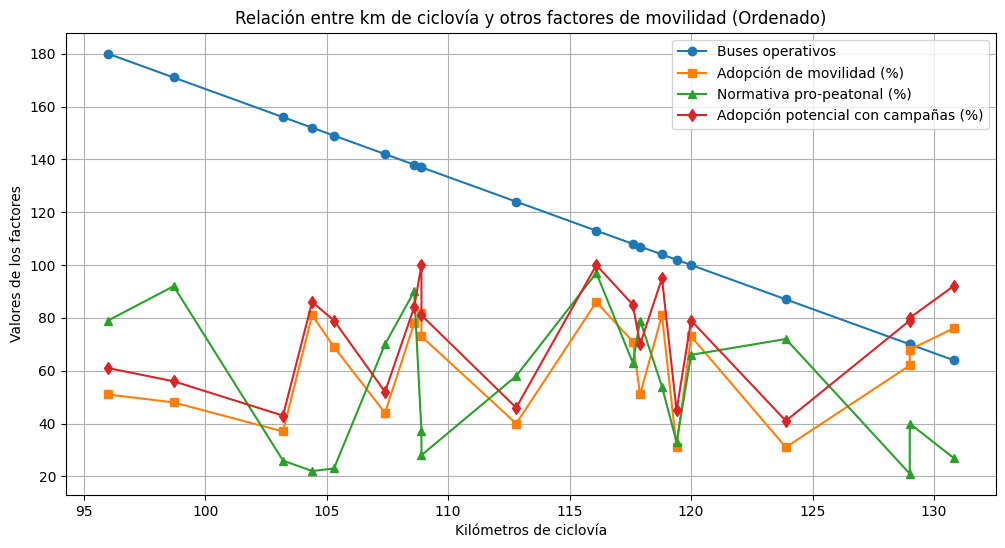

In [ ]:
# Visualización de datos
plt.figure(figsize=(12, 6))
plt.plot(df_situaciones["Ciclovías (km)"], df_situaciones["Buses operativos"], label="Buses operativos", marker='o')
plt.plot(df_situaciones["Ciclovías (km)"], df_situaciones["Adopción de movilidad (%)"], label="Adopción de movilidad (%)", marker='s')
plt.plot(df_situaciones["Ciclovías (km)"], df_situaciones["Normativa pro-peatonal (%)"], label="Normativa pro-peatonal (%)", marker='^')
plt.plot(df_situaciones["Ciclovías (km)"], df_situaciones["Adopción potencial con campañas (%)"], label="Adopción potencial con campañas (%)", marker='d')

plt.xlabel("Kilómetros de ciclovía")
plt.ylabel("Valores de los factores")
plt.title("Relación entre km de ciclovía y otros factores de movilidad (Ordenado)")
plt.legend()
plt.grid(True)
plt.show()